
# 📦 Sentiment Classification with LSTM & GRU + FastText (Bahasa Indonesia)

📅 Generated with Drax

### 🔍 Tujuan
- Menggunakan FastText (cc.id.300.vec) pretrained untuk Bahasa Indonesia
- Melatih dan mengevaluasi LSTM dan GRU berbasis representasi kata pretrained
- Membandingkan performanya


In [1]:

import numpy as np
import pickle
from gensim.models import KeyedVectors
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns


2025-05-31 21:46:39.332320: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load preprocessed data & tokenizer
X_train = np.load("../models/lstm gru/initial/X_train.npy")
X_test = np.load("../models/lstm gru/initial/X_test.npy")
y_train = np.load("../models/lstm gru/initial/y_train.npy")
y_test = np.load("../models/lstm gru/initial/y_test.npy")

with open("../models/lstm gru/initial/tokenizer_lstm.pkl", "rb") as f_tok:
    tokenizer = pickle.load(f_tok)

with open("../models/lstm gru/initial/label_encoder_lstm.pkl", "rb") as f_lbl:
    label_encoder = pickle.load(f_lbl)

word_index = tokenizer.word_index

In [3]:
print("⏳ Loading FastText vector...")
fasttext = KeyedVectors.load_word2vec_format("../pretrained/cc.id.300.vec")

embedding_dim = 300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in fasttext:
        embedding_matrix[i] = fasttext[word]


⏳ Loading FastText vector...


In [5]:
def build_model(model_type="lstm", units=64, dropout=0.5):
    model = Sequential()
    model.add(Embedding(
        input_dim=len(word_index) + 1,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        trainable=False
    ))
    if model_type == "lstm":
        model.add(LSTM(units))
    else:
        model.add(GRU(units))
    model.add(Dropout(dropout))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [7]:
# Train LSTM
model_lstm = build_model("lstm", 64, 0.5)
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test),
                              epochs=15, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4188 - loss: 1.0628 - val_accuracy: 0.5482 - val_loss: 0.9546
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5346 - loss: 0.9724 - val_accuracy: 0.5813 - val_loss: 0.8978
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5732 - loss: 0.9059 - val_accuracy: 0.5675 - val_loss: 0.9252
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6218 - loss: 0.8885 - val_accuracy: 0.5978 - val_loss: 0.8694
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6100 - loss: 0.8395 - val_accuracy: 0.5978 - val_loss: 0.8782
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6550 - loss: 0.8131 - val_accuracy: 0.5978 - val_loss: 0.8616
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6731 - loss: 0.7895 - val_accuracy: 0.6198 - val_loss: 0.8572
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6716 - loss: 0.7756 - val_accuracy: 0.5950 - v

In [8]:
# Train GRU
model_gru = build_model("gru", 64, 0.5)
history_gru = model_gru.fit(X_train, y_train, validation_data=(X_test, y_test),
                            epochs=15, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4289 - loss: 1.0775 - val_accuracy: 0.5014 - val_loss: 1.0163
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4974 - loss: 1.0211 - val_accuracy: 0.4986 - val_loss: 0.9583
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5730 - loss: 0.9378 - val_accuracy: 0.5592 - val_loss: 0.9470
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5961 - loss: 0.9089 - val_accuracy: 0.5620 - val_loss: 0.9307
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6086 - loss: 0.8727 - val_accuracy: 0.5785 - val_loss: 0.9047
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6293 - loss: 0.8081 - val_accuracy: 0.5840 - val_loss: 0.8997
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6534 - loss: 0.7937 - val_accuracy: 0.5923 - val_loss: 0.8944
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6444 - loss: 0.7700 - val_accuracy: 0.6006 - v

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


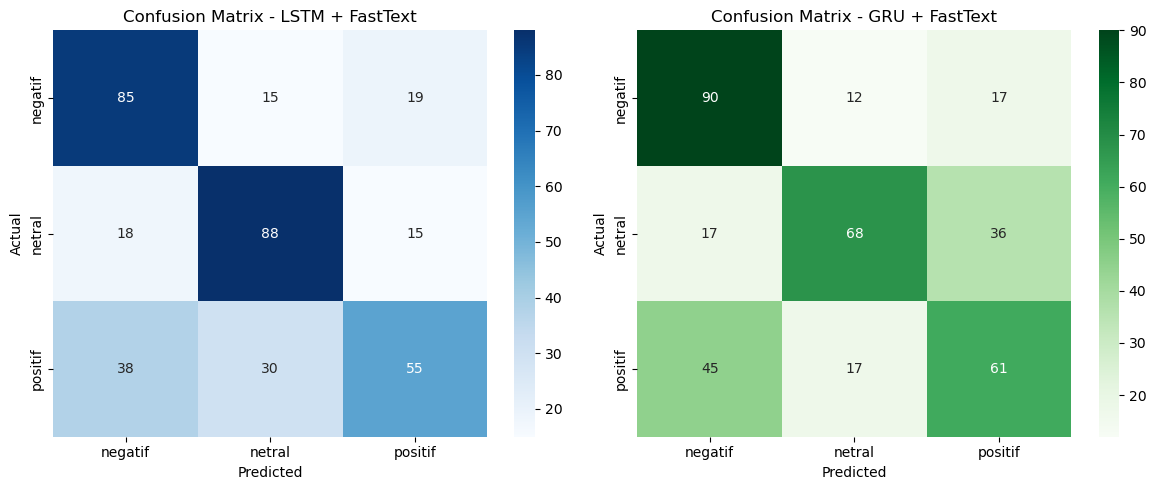

📋 Classification Report - LSTM
              precision    recall  f1-score   support

     negatif       0.60      0.71      0.65       119
      netral       0.66      0.73      0.69       121
     positif       0.62      0.45      0.52       123

    accuracy                           0.63       363
   macro avg       0.63      0.63      0.62       363
weighted avg       0.63      0.63      0.62       363

📋 Classification Report - GRU
              precision    recall  f1-score   support

     negatif       0.59      0.76      0.66       119
      netral       0.70      0.56      0.62       121
     positif       0.54      0.50      0.51       123

    accuracy                           0.60       363
   macro avg       0.61      0.60      0.60       363
weighted avg       0.61      0.60      0.60       363



In [9]:

# Evaluate models
y_pred_lstm = np.argmax(model_lstm.predict(X_test), axis=1)
y_pred_gru = np.argmax(model_gru.predict(X_test), axis=1)
labels = ['negatif', 'netral', 'positif']

# Confusion Matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
cm_gru = confusion_matrix(y_test, y_pred_gru)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - LSTM + FastText")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - GRU + FastText")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print("📋 Classification Report - LSTM")
print(classification_report(y_test, y_pred_lstm, target_names=labels))

print("📋 Classification Report - GRU")
print(classification_report(y_test, y_pred_gru, target_names=labels))


In [10]:
import pickle

# Setelah training selesai:
model_lstm.save("../models/lstm gru/hyperparameter tuning fasttext/lstm_fasttext_model.h5")
model_gru.save("../models/lstm gru/hyperparameter tuning fasttext/gru_fasttext_model.h5")

# Simpan tokenizer dan label encoder
with open("../models/lstm gru/hyperparameter tuning fasttext/tokenizer_fasttext.pkl", "wb") as f_tok:
    pickle.dump(tokenizer, f_tok)

with open("../models/lstm gru/hyperparameter tuning fasttext/label_encoder_fasttext.pkl", "wb") as f_lbl:
    pickle.dump(label_encoder, f_lbl)
